# test NoteSequence representation

In [3]:
# define functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import numpy as np
import os

def moving_average(x, w):
    # defualt window size 201 for calculating moving average
    # keep w to be odd
    if w % 2 == 0:
        w += 1
    half_w = (w-1)//2
    # pad x with averages
    x = np.concatenate([[np.mean(x[:half_w])]*half_w, x, [np.mean(x[-half_w:])]*half_w])
    return np.convolve(x, np.ones(w), 'valid') / w

def get_logs(versions):
    training_logs, validation_logs = [], []
    for version in versions:
        training_logs.append(pd.read_csv(f'lightning_logs/version_{version}/training_logs.csv'))
        validation_logs.append(pd.read_csv(f'lightning_logs/version_{version}/validation_logs.csv'))
    return training_logs, validation_logs

if not os.path.exists('figures/'):
    os.makedirs('figures/')
    
def plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, w):
    plt.figure(figsize=(7, 7))
    for i in range(len(versions)):
        sns.lineplot(x=training_logs[i]['epoch'], y=moving_average(training_logs[i]['loss'].to_numpy(), w=w), label=f'{variable_label}={variables[i]} - training', ci=None, markers=True)
        sns.lineplot(x=validation_logs[i]['epoch'], y=moving_average(validation_logs[i]['val_loss'].to_numpy(), w=w), label=f'{variable_label}={variables[i]} - validation', ci=None, markers=True)
    plt.ylabel('loss')
    plt.title(f'loss changes over epochs for different {variable_label}')
    plt.savefig(f'figures/comparison-{variable_label}.svg')
    plt.savefig(f'figures/comparison-{variable_label}.pdf')
    plt.show()
    
def plot_wer_changes(training_logs, validation_logs, versions, variable_label, variables, w):
    plt.figure(figsize=(15, 7))
    for i in range(len(versions)):
        sns.lineplot(x=training_logs[i]['epoch'], y=moving_average(training_logs[i]['wer'].to_numpy(), w=w), label=f'{variable_label}={variables[i]} - training', ci=None)
        sns.lineplot(x=validation_logs[i]['epoch'], y=moving_average(validation_logs[i]['val_wer'].to_numpy(), w=w), label=f'{variable_label}={variables[i]} - validation', ci=None)
    plt.ylabel('word error rate')
    plt.title(f'Word Error Rate changes over epochs for different {variable_label}')
    plt.savefig(f'figures/comparison-{variable_label}-wer.svg')
    plt.savefig(f'figures/comparison-{variable_label}-wer.pdf')
    plt.show()


# model tuning

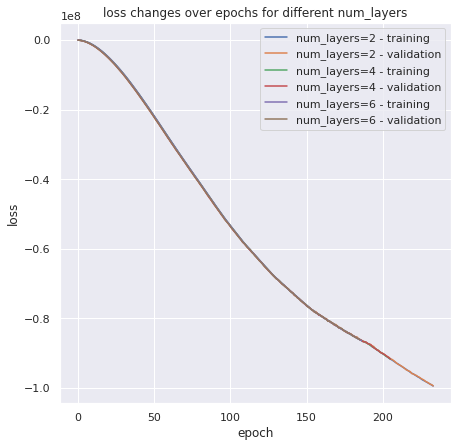

In [4]:
variable_label = 'num_layers'
variables = [2, 4, 6]
versions = [0, 1, 2]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 11)

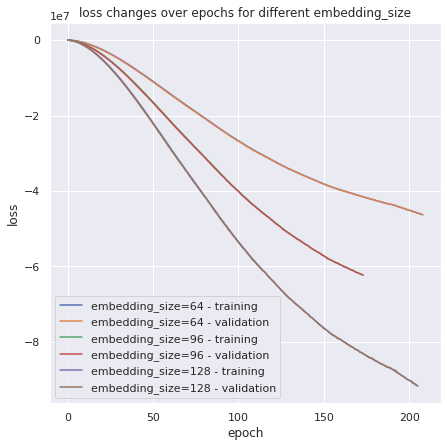

In [5]:
variable_label = 'embedding_size'
variables = [64, 96, 128]
versions = [3, 4, 1]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 11)

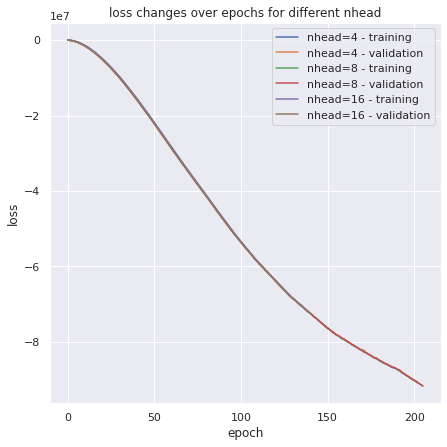

In [6]:
variable_label = 'nhead'
variables = [4, 8, 16]
versions = [5, 1, 6]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 11)

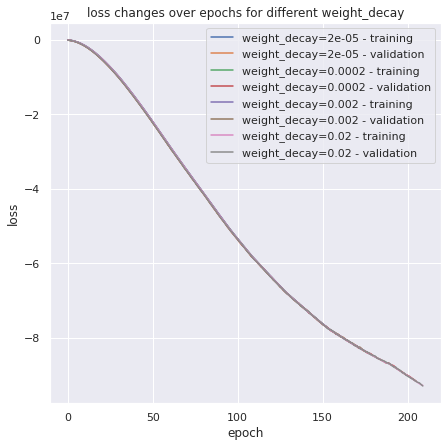

In [7]:
variable_label = 'weight_decay'
variables = [0.00002, 0.0002, 0.002, 0.02]
versions = [7, 1, 8, 9]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 11)

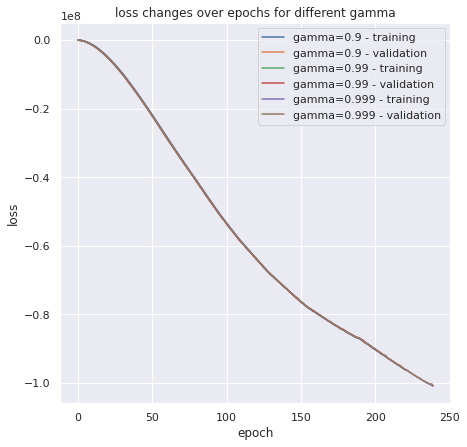

In [8]:
variable_label = 'gamma'
variables = [0.9, 0.99, 0.999]
versions = [10, 1, 11]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 11)